# Visualisations in LIME

In this notebook I attempt to get visualisations using LIME of what my model2 model is picking up on.  I have low hopes of what I'll be able to achieve here as I don't quite understand lime yet...

In [1]:
import os, shutil
import pandas as pd
import numpy as np
import random
np.random.seed(123)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time
import scipy
from PIL import Image
from scipy import ndimage
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping

parent_dir = '../../'

from skimage.io import imread
from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image

Using TensorFlow backend.


### Load Previous Model:  model2

In [3]:
loaded_model = load_model(parent_dir + 'models/model2',
                          custom_objects=None, compile=True)
loaded_model

In [2]:
model = load_model(parent_dir + 'models/model2_save', custom_objects=None, compile=True)
model

### Create Image Paths

In [27]:
train_dir = parent_dir + 'data/seg_train'
validation_dir = parent_dir + 'data/seg_val'
test_dir = parent_dir + 'data/seg_test'

In [28]:
def get_paths(directory):
    buildings_list = os.listdir(directory + '/buildings')
    forest_list = os.listdir(directory + '/forest')
    glacier_list = os.listdir(directory + '/glacier')
    mountain_list = os.listdir(directory + '/mountain')
    sea_list = os.listdir(directory + '/sea')
    street_list = os.listdir(directory + '/street')

    buildings_labels = [0 for img in buildings_list]
    forest_labels = [1 for img in forest_list]
    glacier_labels = [2 for img in glacier_list]
    mountain_labels = [3 for img in mountain_list]
    sea_labels = [4 for img in sea_list]
    street_labels = [5 for img in street_list]
    
    labels = buildings_labels + forest_labels + glacier_labels + mountain_labels + sea_labels + street_labels

    buildings_path = [directory + '/buildings/'+ img_id for img_id in buildings_list]
    forest_path = [directory + '/forest/'+ img_id for img_id in forest_list]
    glacier_path = [directory + '/glacier/'+ img_id for img_id in glacier_list]
    mountain_path = [directory + '/mountain/'+ img_id for img_id in mountain_list]
    sea_path = [directory + '/sea/'+ img_id for img_id in sea_list]
    street_path = [directory + '/street/'+ img_id for img_id in street_list]
    
    path_list = buildings_path + forest_path + glacier_path + mountain_path + sea_path + street_path
    
    directory_df = pd.DataFrame(path_list, columns = ['image_path'])
    directory_df['image_label'] = labels

    return path_list, labels, directory_df

In [29]:
train_path_list, train_labels, train_df = get_paths(train_dir)

### Perform Image Preprocessing

In [6]:
def preprocess_image(path_list):
    output = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(256, 256))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = np.divide(x, 255.0)
        output.append(x)
        array = np.vstack(output)
        rows = array.shape[0]
    return array.reshape(rows, 196608)

In [7]:
img = image.load_img('../../data/seg_train/buildings/12536.jpg', target_size = (256, 256))

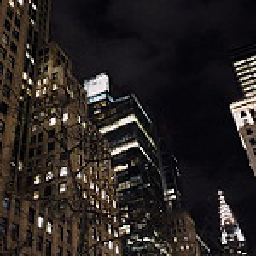

In [8]:
img

In [23]:
img.__dict__

{'im': <ImagingCore at 0x1a6bf90570>,
 'mode': 'RGB',
 '_size': (256, 256),
 'palette': None,
 'info': {'jfif': 257,
  'jfif_version': (1, 1),
  'jfif_unit': 0,
  'jfif_density': (1, 1)},
 'category': 0,
 'readonly': 0,
 'pyaccess': None,
 '_exif': None,
 'encoderinfo': {},
 'encoderconfig': (False, -1, -1, b'')}

In [30]:
three_train_imgs = train_path_list[:3]

In [31]:
images = preprocess_image(three_train_imgs)
images[0].shape

(196608,)

In [16]:
images.shape

(3, 196608)

In [19]:
images[0]

array([0.03921569, 0.02352941, 0.        , ..., 0.0627451 , 0.05882353,
       0.05098039], dtype=float32)

In [21]:
array_to_img(images[0])

ValueError: Expected image array to have rank 3 (single image). Got array with shape: (196608,)

TypeError: Invalid shape (196608,) for image data

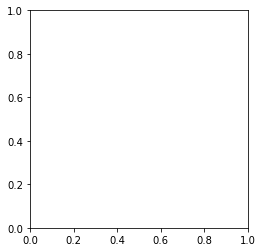

In [25]:
building_test = images[0]
plt.imshow(building_test);

In [26]:
building_test.shape

(196608,)

In [22]:
def new_predict_fn(images):
    images = convert_to_1channel(images)
    return loaded_model.predict(images)

In [42]:
images.shape[0]

11230

In [37]:
reshape_images = images.reshape(11230, 196608)

In [38]:
reshape_images.shape

(11230, 196608)

In [41]:
preds = model.predict(reshape_images)

In [33]:
# Instantiate the LimeImageExplainer()
explainer = lime_image.LimeImageExplainer()

In [22]:
preds = model.predict_classes(train_img)

In [25]:
preds.shape

(1123,)

In [ ]:
def custom_regressor(x_test):
    predictions = model.predict(x_test)
    return predictions.reshape(1, -1)

In [ ]:
explanation = explainer.explain_instance(building_test, custom_regressor,
                                         top_labels=6, hide_color=0)

In [34]:
explanation = explainer.explain_instance(img, model.predict,
                                         top_labels=6, hide_color=0)

AttributeError: 'Image' object has no attribute 'shape'